In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('data/Iris.xls')

In [3]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# dựa vào petallength dự đoán petalwidth

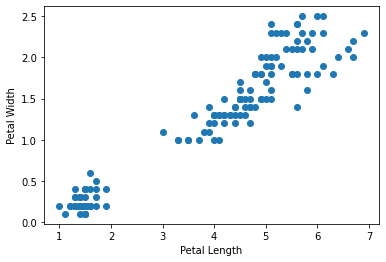

In [6]:
plt.scatter(df['petallength'], df['petalwidth'])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In [7]:
df[['petallength', 'petalwidth']].corr()

,petallength,petalwidth
petallength,1.000000,0.962757
petalwidth,0.962757,1.000000


In [10]:
# chọn thuật toán KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [9]:
# chuẩn bị dữ liệu
X = df[['petallength']]
y = df['petalwidth']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# lựa chọn giá trị k phù hợp
from sklearn.metrics import accuracy_score

In [26]:
lst_k = [] #danh sách các giá trị k
lst_r_score = [] #danh sách các độ chính xác tương ứng với các giá trị k
for k in range(2, 8): #np.sqrt(X_train.shape[0])/2
    lst_k.append(k)
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    yhat_test = knn.predict(X_test)
    score = knn.score(X_test, y_test) * 100
    lst_r_score.append(score)
    
    print('K =', k,'- R^2 score:', score,'%')

K = 2 - R^2 score: 92.65849778880946 %
K = 3 - R^2 score: 94.42978086198559 %
K = 4 - R^2 score: 94.42832421472146 %
K = 5 - R^2 score: 94.29670156793512 %
K = 6 - R^2 score: 94.43852074557034 %
K = 7 - R^2 score: 94.37294189118953 %


In [25]:
vitri = lst_r_score.index(max(lst_r_score))
k_best = lst_k[vitri]
print('Giá trị K phù hợp nhất là', k_best,'với R^2 score là', lst_r_score[vitri])

Giá trị K phù hợp nhất là 6 với R^2 score là 94.43852074557034


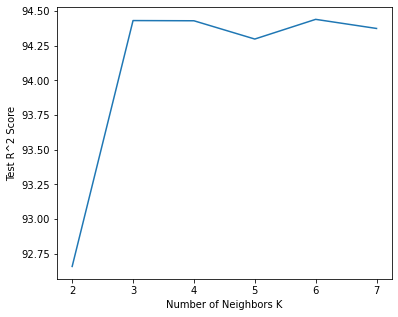

In [27]:
# trực quan kết quả theo k
plt.figure(figsize=(6,5))
plt.plot(lst_k, lst_r_score)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test R^2 Score')
plt.show()

In [28]:
# sau khi chọn k=6 => áp dụng model với k đã chọn
model = KNeighborsRegressor(n_neighbors=6)

In [29]:
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=6)

In [30]:
yhat_test = model.predict(X_test)

In [31]:
#kiểm tra độ chính xác
print('Trainning R^2 score:', model.score(X_train, y_train))
print('Testing R^2 score:', model.score(X_test, y_test))

Trainning R^2 score: 0.9454627768957575
Testing R^2 score: 0.9443852074557034


In [32]:
# kiểm tra RMSE
from sklearn.metrics import mean_squared_error

In [33]:
print('RMSE: ', mean_squared_error(y_test, yhat_test, squared=False))

RMSE:  0.18802088142504766


In [34]:
df_test = pd.DataFrame({
    'Actual': y_test,
    'Prediction': yhat_test
})
df_test.head(10)

,Actual,Prediction
73,1.2,1.616667
18,0.3,0.350000
118,2.3,2.083333
78,1.5,1.516667
76,1.4,1.616667
31,0.4,0.200000
64,1.3,1.083333
141,2.3,1.850000
68,1.5,1.516667
82,1.2,1.216667


In [39]:
X_new = [[1.4], [2.5]]
y_new = model.predict(X_new)

array([2.08333333, 2.08333333])